# 03: Playing with CNNs

- Try following the tutorial here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- Make sure that things are working properly, potentially experiment with some run times (CPU, GPU)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time

## Model Set-up

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [31]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [32]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [34]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

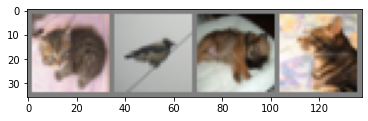

cat   bird  dog   cat  


In [11]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
images[0].shape

torch.Size([3, 32, 32])

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
# Define loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [7]:
start_time = time.time()
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
print('Finished Training')

total_time = end_time - start_time

[1,  2000] loss: 2.201
[1,  4000] loss: 1.908
[1,  6000] loss: 1.678
[1,  8000] loss: 1.613
[1, 10000] loss: 1.540
[1, 12000] loss: 1.479
[2,  2000] loss: 1.420
[2,  4000] loss: 1.412
[2,  6000] loss: 1.354
[2,  8000] loss: 1.331
[2, 10000] loss: 1.328
[2, 12000] loss: 1.296
[3,  2000] loss: 1.245
[3,  4000] loss: 1.227
[3,  6000] loss: 1.200
[3,  8000] loss: 1.209
[3, 10000] loss: 1.197
[3, 12000] loss: 1.207
[4,  2000] loss: 1.125
[4,  4000] loss: 1.125
[4,  6000] loss: 1.146
[4,  8000] loss: 1.124
[4, 10000] loss: 1.113
[4, 12000] loss: 1.117
[5,  2000] loss: 1.031
[5,  4000] loss: 1.056
[5,  6000] loss: 1.049
[5,  8000] loss: 1.081
[5, 10000] loss: 1.053
[5, 12000] loss: 1.042
Finished Training


In [8]:
total_time/60

2.7954519351323444

In [9]:
# save model
PATH = '../results/cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test network on test data

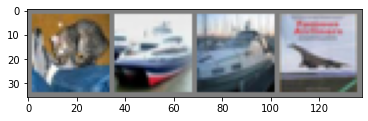

GroundTruth:  cat   ship  ship  plane


In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

In [16]:
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   plane ship  plane


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


## Move to GPU

In [18]:
torch.cuda.is_available()

True

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [24]:
# try training on GPU
net_gpu = Net().to(device)
# Define loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_gpu.parameters(), lr = 0.001, momentum = 0.9)

In [25]:
start_time = time.time()
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_gpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

end_time = time.time()
print('Finished Training')

total_time_gpu = end_time - start_time

[1,  2000] loss: 2.203
[1,  4000] loss: 1.874
[1,  6000] loss: 1.665
[1,  8000] loss: 1.579
[1, 10000] loss: 1.494
[1, 12000] loss: 1.460
[2,  2000] loss: 1.386
[2,  4000] loss: 1.384
[2,  6000] loss: 1.323
[2,  8000] loss: 1.315
[2, 10000] loss: 1.300
[2, 12000] loss: 1.292
[3,  2000] loss: 1.216
[3,  4000] loss: 1.212
[3,  6000] loss: 1.189
[3,  8000] loss: 1.189
[3, 10000] loss: 1.172
[3, 12000] loss: 1.178
[4,  2000] loss: 1.114
[4,  4000] loss: 1.085
[4,  6000] loss: 1.115
[4,  8000] loss: 1.071
[4, 10000] loss: 1.080
[4, 12000] loss: 1.089
[5,  2000] loss: 0.990
[5,  4000] loss: 1.011
[5,  6000] loss: 1.042
[5,  8000] loss: 1.034
[5, 10000] loss: 1.012
[5, 12000] loss: 1.022
Finished Training


In [27]:
total_time_gpu/60

3.721224856376648

Haha, it actually took longer! It seems for simple tasks, CPU may outperform GPU.